Lab 5: Linear Regression Using Packages

Nidhi Mehta

0827CI191039

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Salary_Data.csv")

In [6]:
data.head(20)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


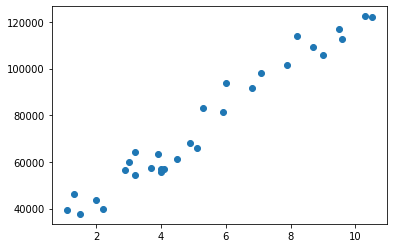

In [7]:
plt.scatter(data['YearsExperience'], data['Salary'])
plt.show()

Correlating Data

In [11]:
corr = data.corr()
print(corr)

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


Splitting Data

In [12]:
train_data, test_data = train_test_split(data, test_size=.2, random_state=42)

In [13]:
train_x, train_y = np.array(train_data['YearsExperience']).reshape(-1,1),np.array(train_data['Salary']).reshape(-1,1)
test_x, test_y = np.array(test_data['YearsExperience']).reshape(-1,1),np.array(test_data['Salary']).reshape(-1,1)

Creating Model


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
print(train_x)

[[ 1.77445774]
 [ 1.21912622]
 [-0.41216011]
 [-1.41869849]
 [-1.03690807]
 [-0.03036969]
 [-0.79395053]
 [-0.37745189]
 [-0.41216011]
 [ 0.94146047]
 [-1.34928205]
 [-1.27986561]
 [ 1.32325088]
 [-1.10632451]
 [ 0.66379471]
 [ 1.49679198]
 [ 0.24729607]
 [ 1.84387418]
 [ 0.55967005]
 [-0.68982587]
 [-0.44686833]
 [-0.23861901]
 [ 0.28200429]
 [-0.75924231]]


In [16]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [17]:
model.score(train_x,train_y)

0.9645401573418148

In [18]:
score = cross_val_score(model, train_x,train_y,scoring='neg_mean_absolute_error',cv=3)
score = (-score)
score.mean()

4332.312200086067

In [19]:
test_x = scaler.transform(test_x)
test_predict = model.predict(test_x)
score = mean_absolute_error(test_y,test_predict)
score

148954.56769359927

In [20]:
model.score(test_x,test_y)

-45.8775480923555

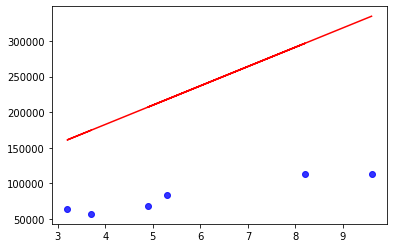

In [21]:
plt.scatter(test_x,test_y,color = 'b',alpha = 0.8)
plt.plot(test_x,test_predict,color='r')
plt.show()